<a href="https://colab.research.google.com/github/jtao22/PythonAI/blob/main/StockMarket/closepriceprediction3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#import
from sklearn.svm import SVR
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot 
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler as mms
pyplot.style.use('fivethirtyeight')

In [16]:
#upload data
data = pdr.DataReader('FB', data_source="yahoo", start = "2010-1-1")
data.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999


In [17]:
#split
Y = 
Y = data['Adj Close'].values
data = data.drop(labels=['Adj Close', 'Close'], axis = 1)

In [18]:
#resize/split into train/test
scaler = mms(feature_range=(0,1))
data = scaler.fit_transform(data)
trainX,testX,trainY,testY = tts(data, Y, test_size = 0.2, random_state = 42)

In [29]:
#Create SVR
lsvr = SVR(kernel='linear', C=1000.0)
lsvr.fit(trainX,trainY)
psvr = SVR(kernel='poly', C=1000.0, degree=2)
psvr.fit(trainX, trainY)
rsvr = SVR(kernel='rbf', C=1000.0, gamma=0.15)
rsvr.fit(trainX, trainY)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

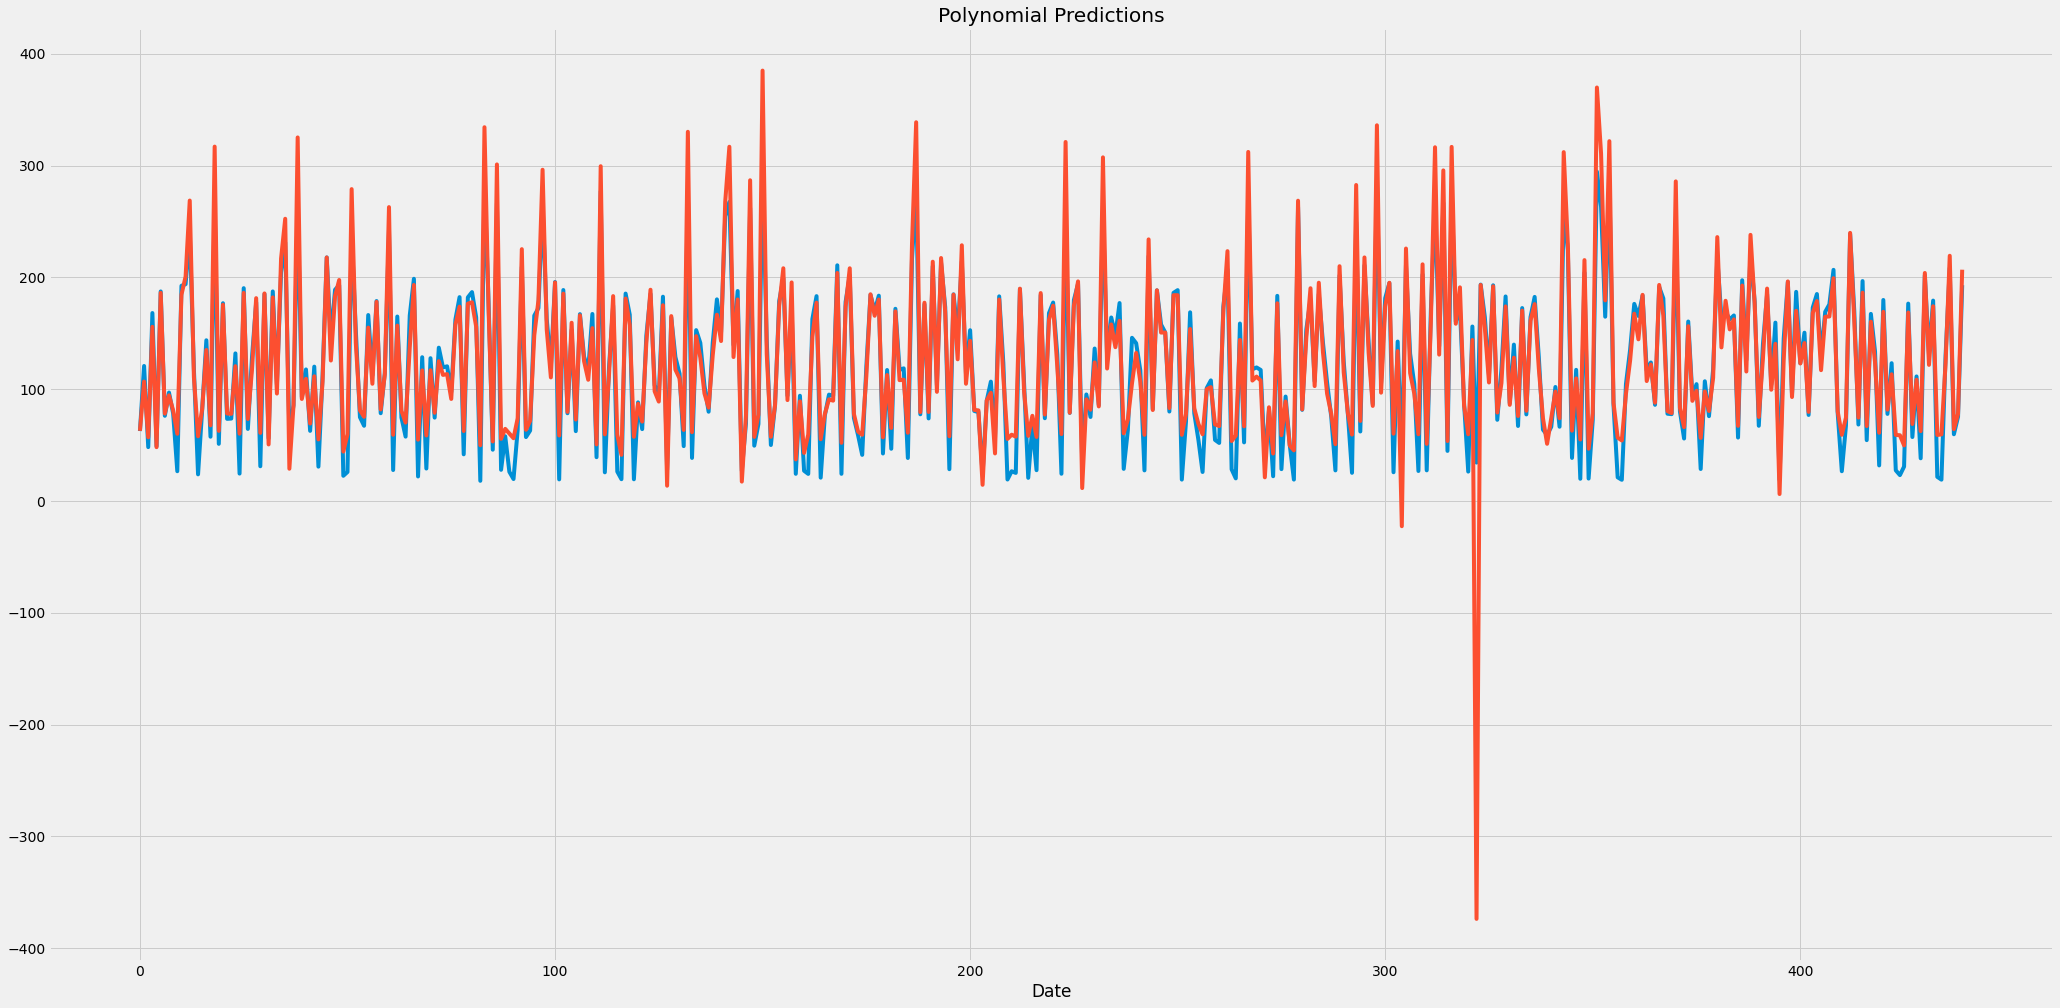

In [32]:
#predict
lpredictions = lsvr.predict(testX)
ppredictions = psvr.predict(testX)
rpredictions = rsvr.predict(testX)
#plot
pyplot.figure(figsize=(32,16))
pyplot.title('Polynomial Predictions')
pyplot.xlabel('Date', fontsize=17)
pyplot.plot(testY)
pyplot.plot(ppredictions)
pyplot.show()

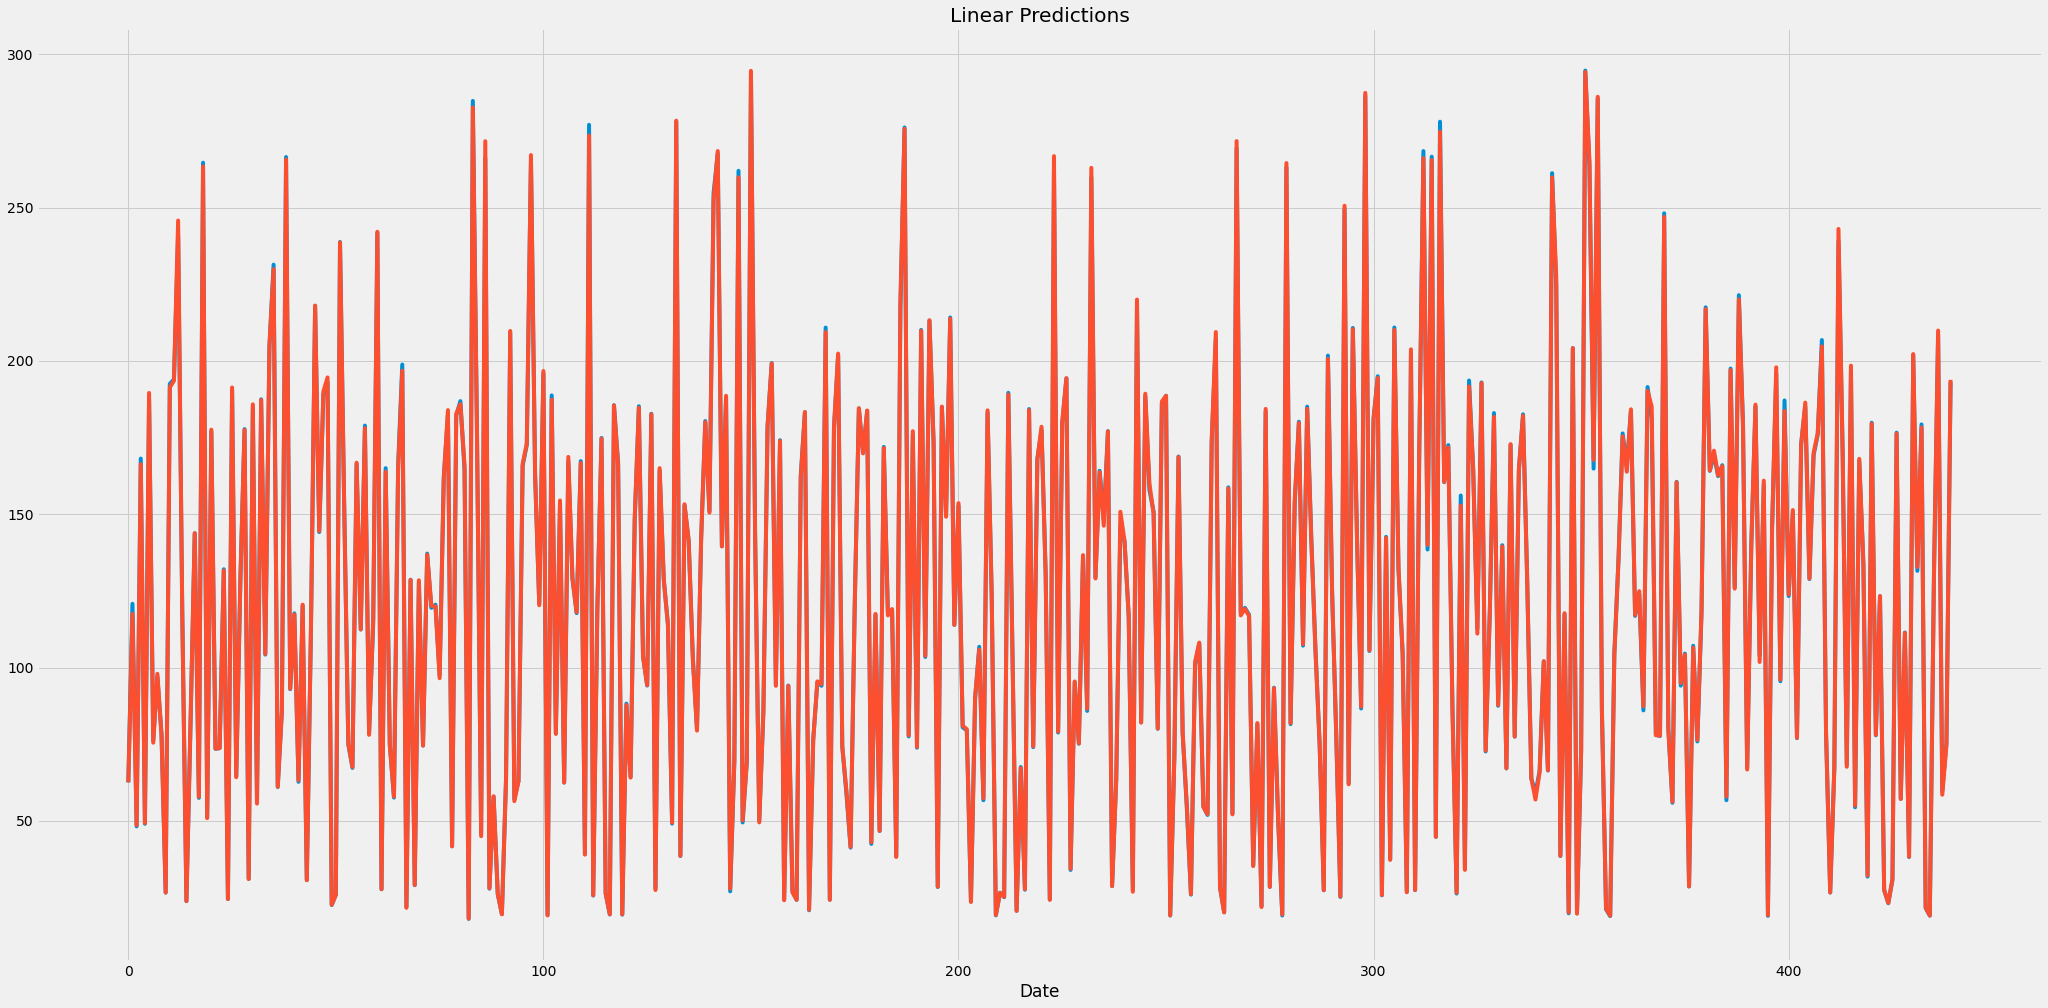

In [36]:
#plot
pyplot.figure(figsize=(32,16))
pyplot.title('Linear Predictions')
pyplot.xlabel('Date', fontsize=17)
pyplot.plot(testY)
pyplot.plot(lpredictions)
pyplot.show()

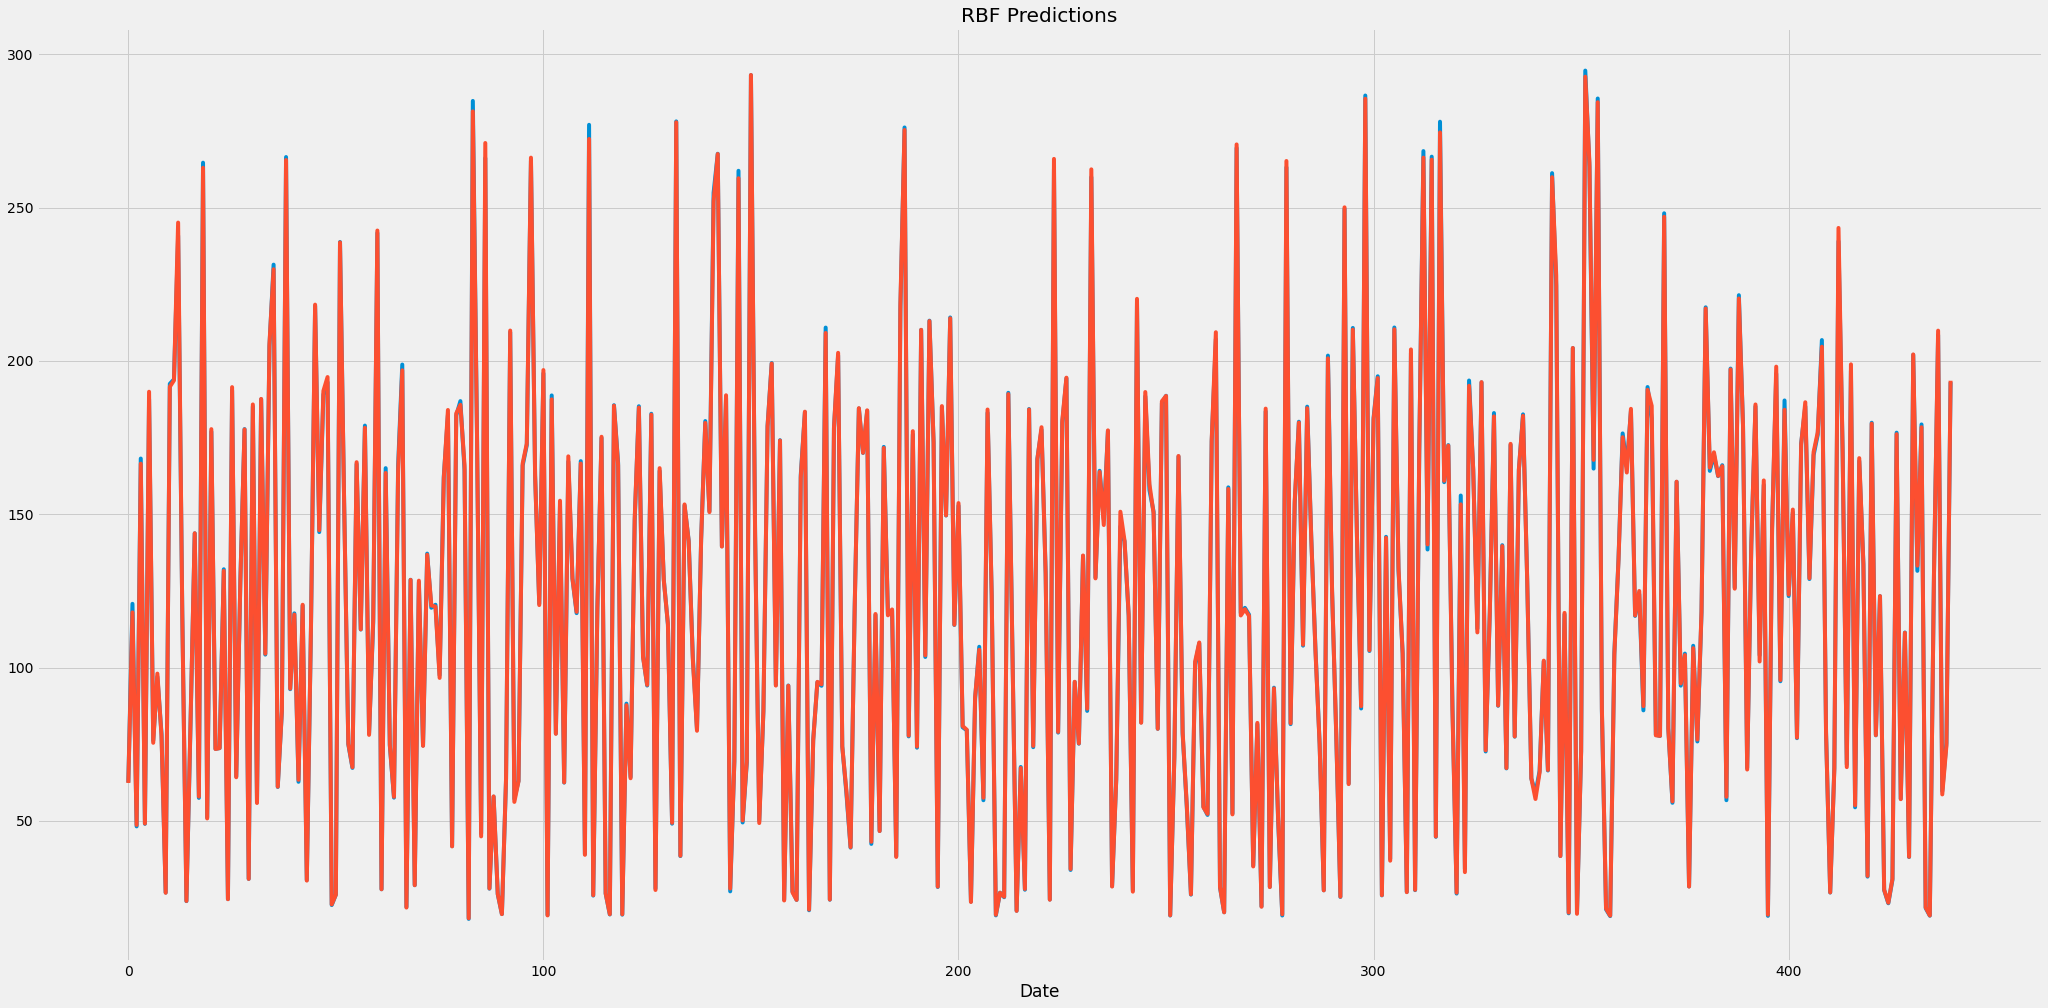

In [37]:
#plot
pyplot.figure(figsize=(32,16))
pyplot.title('RBF Predictions')
pyplot.xlabel('Date', fontsize=17)
pyplot.plot(testY)
pyplot.plot(rpredictions)
pyplot.show()

In [38]:
lcount = 0
pcount = 0
rcount = 0
total = len(testY)
for i in range(len(testY)):
  if (lpredictions[i] <= testY[i]+2 and lpredictions[i] >= testY[i]-2):
    lcount = lcount + 1
  if (ppredictions[i] <= testY[i]+2 and ppredictions[i] >= testY[i]-2):
    pcount = pcount + 1
  if (rpredictions[i] <= testY[i]+2 and rpredictions[i] >= testY[i]-2):
    rcount = rcount + 1
print("linear:", lcount/total*100,'%')
print("polynomial:", pcount/total*100,'%')
print("rbf:", rcount/total*100,'%')

linear: 93.63636363636364 %
polynomial: 12.272727272727273 %
rbf: 94.31818181818183 %
